<a href="https://colab.research.google.com/github/dinaOuahbi/BMI_dataset/blob/main/BMI_Dataset_Predicting_the_BMI_with_help_of_various_attributes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This data frame contains the following columns:

Gender : Male / Female
Height : Number (cm)
Weight : Number (Kg)

Index : 0 - Extremely Weak 1 - Weak 2 - Normal 3 - Overweight 4 - Obesity 5 - Extreme Obesity

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import matthews_corrcoef, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns

In [ ]:
df = pd.read_csv('bmi.csv')
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


In [ ]:
print(df.shape)
print(df.dtypes)

(500, 4)
Gender    object
Height     int64
Weight     int64
Index      int64
dtype: object


In [ ]:
df.isna().sum()

Gender    0
Height    0
Weight    0
Index     0
dtype: int64

In [ ]:
df.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


In [ ]:
df.corr()

,Height,Weight,Index
Height,1.000000,0.000446,-0.422223
Weight,0.000446,1.000000,0.804569
Index,-0.422223,0.804569,1.000000


In [ ]:
sns.heatmap(df.corr(), cmap='cividis')

<AxesSubplot:>

In [ ]:
a!pip install autoviz

In [ ]:
from autoviz.AutoViz_Class import AutoViz_Class

AV = AutoViz_Class()


In [ ]:
filename = "bmi.csv"
sep = ","
dft = AV.AutoViz(
    filename,
    sep=",",
    depVar="",
    dfte=None,
    header=0,
    verbose=0,
    lowess=False,
    chart_format="svg",
    max_rows_analyzed=150000,
    max_cols_analyzed=30,
)

Shape of your Data Set loaded: (500, 4)
############## C L A S S I F Y I N G  V A R I A B L E S  ####################
Classifying variables in data set...
    4 Predictors classified...
        No variables removed since no ID or low-information variables found in data set
Number of All Scatter Plots = 6
Time to run AutoViz = 1 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [ ]:
for col in df.select_dtypes('int'):
  print(col)
  plt.figure()
  df[col].plot.hist(bins=200)

Height
Weight
Index


In [ ]:
# encodage
df.columns
df['Gender'].value_counts()
df['Gender'] = df['Gender'].map({'Female':0, 'Male':1})

In [ ]:
df['Gender'] = df['Gender'].astype('object')

In [ ]:
df['Index'] = df['Index'].astype('object')

In [ ]:
for col in df.select_dtypes('object'):
  plt.figure(figsize=(4,6))
  df[col].value_counts().plot.pie()

In [ ]:
#prediction od Index
df.columns

Index(['Gender', 'Height', 'Weight', 'Index'], dtype='object')

In [ ]:
X = df.drop('Index', axis=1)
y = df['Index']
print(X.shape, y.shape)

(500, 3) (500,)


In [ ]:
def eval_split(model, X, y):
  if y.dtypes == 'O':
    y = y.astype('int')
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
  print('train shape : ',X_train.shape,'test shape: ',X_test.shape)
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  mcc = matthews_corrcoef(y_test, y_pred)

  return mcc


In [ ]:
cart = DecisionTreeClassifier(random_state=0)
svc = SVC(random_state=0, probability=True)
lr = LogisticRegression(random_state=0)
rf = RandomForestClassifier(random_state=0)

classifiers = [cart, svc, lr, rf]

In [ ]:
score_dict = {}
for model in classifiers:
  print(model.__class__.__name__)
  score_dict[model.__class__.__name__] = eval_split(model, X, y)

DecisionTreeClassifier
train shape :  (375, 3) test shape:  (125, 3)
SVC
train shape :  (375, 3) test shape:  (125, 3)
LogisticRegression
train shape :  (375, 3) test shape:  (125, 3)
RandomForestClassifier
train shape :  (375, 3) test shape:  (125, 3)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
score_dict

{'DecisionTreeClassifier': 0.7520570755416021,
 'LogisticRegression': 0.6453173215759428,
 'RandomForestClassifier': 0.8221607301915429,
 'SVC': 0.7001913883076476}

In [ ]:
def eval_cv(model, X, y):
  if y.dtypes=='O':
    y=y.astype('int')

  skf = StratifiedKFold(n_splits=10)
  print('Split numbers ==> {}'.format(skf.get_n_splits(X,y)))
  mcc_cv = []

  for train_index, test_index in skf.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mcc_fold = matthews_corrcoef(y_test, y_pred)
    mcc_cv.append(mcc_fold)

  return np.mean(mcc_cv)




In [ ]:
cv_dict = {}
for model in classifiers:
  print(model.__class__.__name__)
  cv_dict[model.__class__.__name__] = eval_cv(model, X, y)

DecisionTreeClassifier
Split numbers ==> 10
TRAIN: [ 32  36  45  48  51  52  55  56  57  58  59  61  62  63  64  65  66  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85
  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103
 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157
 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175
 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193
 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211
 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229
 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247
 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265
 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  33  34  35  37
  38  39  40  41  42  43  44  46  47  49  50  53  54  60  79  85  91  92
  98  99 103 104 105 108 109 110 111 112 114 115 116 117 118 119 120 121
 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139
 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157
 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175
 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193
 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211
 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229
 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247
 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265
 266 267 268 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283
 284 285 286 287 288 289 290 291 292 293 294

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 209 210 211 212 213 214 215 216 217
 218 219 220 221 222 223 224 225 227 228 229 231 236 237 238 239 241 242
 243 244 245 247 248 250 251 252 253 254 255

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244

In [ ]:
cv_dict

{'DecisionTreeClassifier': 0.8110630029244398,
 'LogisticRegression': 0.6542260413339513,
 'RandomForestClassifier': 0.8477276794242957,
 'SVC': 0.7476371443095069}

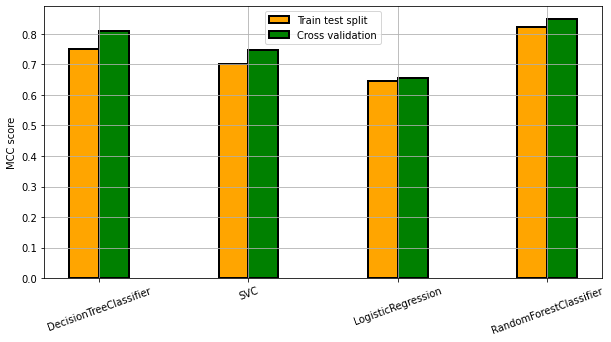

In [ ]:
from matplotlib import pyplot
barWidth = 0.2
y1 = score_dict.values()
y2 = cv_dict.values()
r1 = range(len(y1))
r2 = [x + barWidth for x in r1]
plt.figure(figsize=(10, 5))
pyplot.bar(r1, y1, width = barWidth, color = ['orange' for i in y1],
           edgecolor = ['black' for i in y1], linewidth = 2, label='Train test split')
pyplot.bar(r2, y2, width = barWidth, color = ['green' for i in y1],
           edgecolor = ['black' for i in y1], linewidth = 2, label='Cross validation')
pyplot.xticks([r + barWidth / 2 for r in range(len(y1))], cv_dict.keys(), rotation=20)
plt.legend()
plt.grid(True)
plt.ylabel('MCC score')
plt.show()

PYCARET